In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import utils
from utils import *
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
trainset = pd.read_csv('../input/train_ctrUa4K.csv')
testset =  pd.read_csv('../input/test_lAUu6dG.csv')

In [3]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
testset['Loan_Status'] = 'X'

In [5]:
dataset = trainset.append(testset, ignore_index=True, sort=False)

In [6]:
dataset.shape

(981, 13)

In [7]:
trainset.shape

(614, 13)

In [8]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
dataset.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

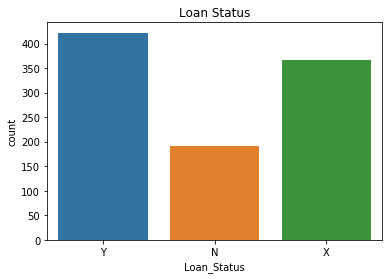

In [10]:
fig = sb.countplot(dataset['Loan_Status'])
plt.title('Loan Status')
plt.show(fig)

### Cat features

In [11]:
dataset.loc[:, 'Gender'].value_counts(dropna=False)

Male      775
Female    182
NaN        24
Name: Gender, dtype: int64

In [12]:
dataset['Gender'].fillna(value='Male', inplace=True)

In [13]:
gender_dic = {'Male': 1, 'Female': 0}
dataset['Gender1'] = dataset['Gender'].map(gender_dic)
del dataset['Gender']

In [14]:
dataset.loc[:, 'Married'].value_counts(dropna=False)

Yes    631
No     347
NaN      3
Name: Married, dtype: int64

In [15]:
dataset['Married'].fillna(value='Yes', inplace=True)

In [16]:
married_dic ={'Yes': 1, 'No': 0}
dataset['Married1'] = dataset['Married'].map(married_dic)
del dataset['Married']

In [17]:
dataset.loc[:, 'Education'].value_counts(dropna=False)

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [18]:
edu_dic = {'Graduate': 1, 'Not Graduate': 0}
dataset['Education1'] = dataset['Education'].map(edu_dic)
del dataset['Education']

In [19]:
dataset.loc[:, 'Self_Employed'].value_counts(dropna=False)

No     807
Yes    119
NaN     55
Name: Self_Employed, dtype: int64

In [20]:
dataset['Self_Employed'].fillna(value='No', inplace=True)

In [21]:
edu_dic = {'No': 1, 'Yes': 0}
dataset['Self_Employed1'] = dataset['Self_Employed'].map(edu_dic)
del dataset['Self_Employed']

In [22]:
dataset.loc[:, 'Property_Area'].value_counts(dropna=False)

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [23]:
dataset.loc[:, 'Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [24]:
dataset.loc[(dataset['Dependents'] == '3+'), 'Dependents'] = '3'

In [25]:
dataset.loc[:, 'Dependents'].value_counts(dropna=False)

0      545
1      160
2      160
3       91
NaN     25
Name: Dependents, dtype: int64

In [26]:
dataset['Dependents'].fillna(value='0', inplace=True)

In [27]:
dataset['Dependents'] = dataset['Dependents'].astype(int)

### Numeric features

In [28]:
dataset_num = dataset.select_dtypes(include=[np.number])

In [29]:
corrmat = dataset_num.corr()
corrmat

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender1,Married1,Education1,Self_Employed1
Dependents,1.000000,0.122136,0.003223,0.151004,-0.083281,-0.046848,0.139248,0.344291,-0.084894,-0.026241
ApplicantIncome,0.122136,1.000000,-0.114247,0.551811,-0.023089,0.023378,0.060444,0.052126,0.138909,-0.113106
CoapplicantIncome,0.003223,-0.114247,1.000000,0.179228,-0.043860,-0.027253,0.082428,0.061606,0.060380,0.018861
LoanAmount,0.151004,0.551811,0.179228,1.000000,0.055636,-0.008235,0.097640,0.158671,0.165053,-0.108334
Loan_Amount_Term,-0.083281,-0.023089,-0.043860,0.055636,1.000000,-0.020439,-0.070238,-0.048638,0.024396,0.031380
Credit_History,-0.046848,0.023378,-0.027253,-0.008235,-0.020439,1.000000,0.022663,0.022907,0.066182,-0.037039
Gender1,0.139248,0.060444,0.082428,0.097640,-0.070238,0.022663,1.000000,0.327012,-0.040649,-0.024719
Married1,0.344291,0.052126,0.061606,0.158671,-0.048638,0.022907,0.327012,1.000000,-0.026211,-0.013666
Education1,-0.084894,0.138909,0.060380,0.165053,0.024396,0.066182,-0.040649,-0.026211,1.000000,-0.010848
Self_Employed1,-0.026241,-0.113106,0.018861,-0.108334,0.031380,-0.037039,-0.024719,-0.013666,-0.010848,1.000000


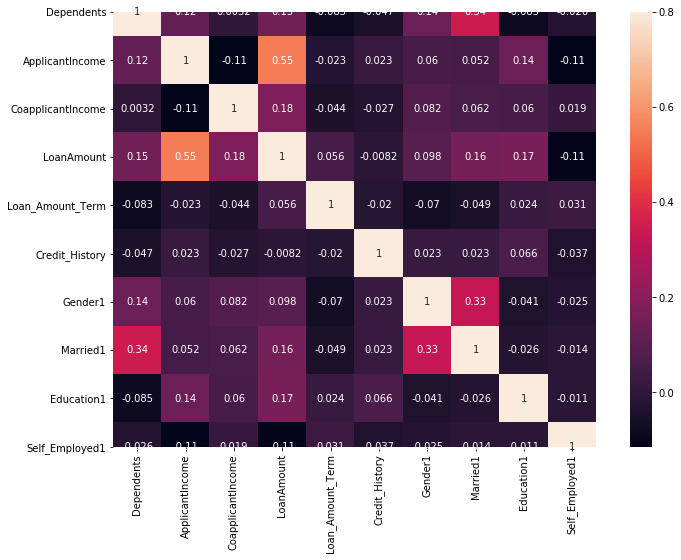

In [30]:
f, ax = plt.subplots(figsize=(12,8))
sb.heatmap(corrmat, vmax=.8, square=True, annot = True);

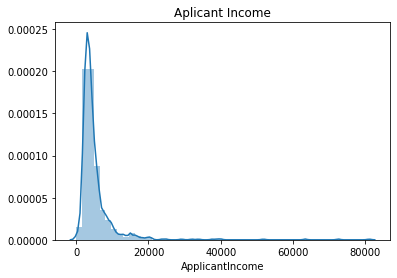

In [31]:
fig = sb.distplot(dataset.loc[:, 'ApplicantIncome'])
plt.title('Aplicant Income')
plt.show(fig)

In [32]:
dataset.loc[:, 'ApplicantIncome'].value_counts(dropna=False)

2500     13
5000     11
3333     10
3500      9
2600      8
         ..
14999     1
4758      1
4755      1
4364      1
3691      1
Name: ApplicantIncome, Length: 752, dtype: int64

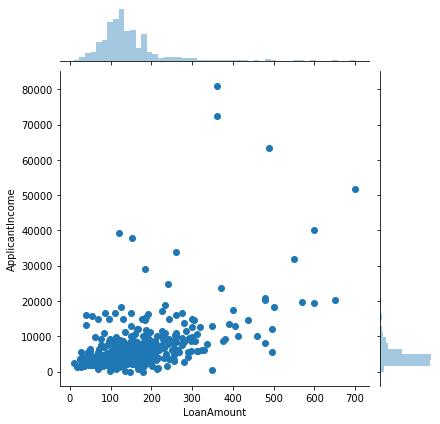

In [33]:
sb.jointplot(x='LoanAmount', y='ApplicantIncome', data=dataset)

In [34]:
rm_IQR_outliers(dataset, 'ApplicantIncome')

In [35]:
dataset.loc[:, 'LoanAmount'].value_counts(dropna=False)

120.0    29
NaN      27
110.0    27
100.0    24
187.0    21
         ..
196.0     1
400.0     1
250.0     1
500.0     1
156.0     1
Name: LoanAmount, Length: 233, dtype: int64

In [36]:
dataset.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender1,Married1,Education1,Self_Employed1
count,981.000000,981.000000,981.000000,954.000000,961.000000,902.000000,981.000000,981.000000,981.000000,981.000000
mean,0.767584,4701.416922,1601.916330,142.511530,342.201873,0.835920,0.814475,0.646279,0.777778,0.878695
std,1.030657,2879.126008,2718.772806,77.421743,65.100602,0.370553,0.388921,0.478368,0.415952,0.326648
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,13439.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000


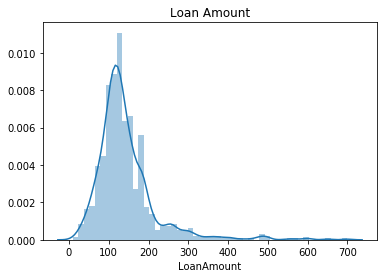

In [37]:
fig = sb.distplot(dataset.loc[:, 'LoanAmount'].dropna())
plt.title('Loan Amount')
plt.show(fig)

In [38]:
print(statistics.mode(dataset['LoanAmount']))

120.0


In [39]:
dataset['LoanAmount'].fillna(value=120, inplace=True)

In [40]:
rm_IQR_outliers(dataset, 'LoanAmount')

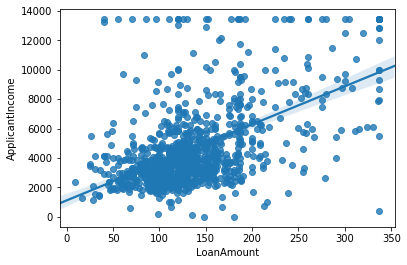

In [41]:
sb.regplot(x='LoanAmount', y='ApplicantIncome', data=dataset)

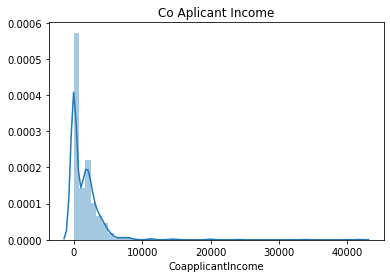

In [42]:
fig = sb.distplot(dataset.loc[:, 'CoapplicantIncome'])
plt.title('Co Aplicant Income')
plt.show(fig)

In [43]:
dataset.loc[:, 'CoapplicantIncome'].value_counts()

0.0       429
2500.0      6
2083.0      5
2000.0      5
2333.0      5
         ... 
1131.0      1
4700.0      1
2374.0      1
5302.0      1
3422.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [44]:
dataset.loc[(dataset['CoapplicantIncome'] > 0), 'CoapplicantIncome'].describe()

count      552.000000
mean      2846.883913
std       3097.756786
min         16.120001
25%       1600.000000
50%       2168.000000
75%       3253.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [45]:
dataset['CoapplicantIncome'].fillna(value=2846.88, inplace=True)

In [46]:
rm_IQR_outliers(dataset, 'CoapplicantIncome')

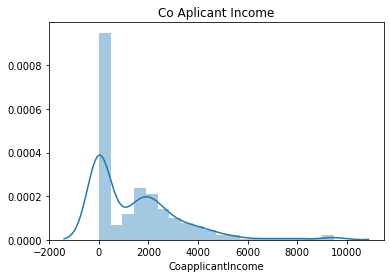

In [47]:
ig = sb.distplot(dataset.loc[:, 'CoapplicantIncome'])
plt.title('Co Aplicant Income')
plt.show(fig)

In [48]:
dataset.loc[:, 'Credit_History'].value_counts(dropna=False)

1.0    754
0.0    148
NaN     79
Name: Credit_History, dtype: int64

In [49]:
dataset['Credit_History'].fillna(value=1.0, inplace=True)

In [50]:
dataset.loc[:, 'Loan_Amount_Term'].value_counts(dropna=False)

360.0    823
180.0     66
480.0     23
300.0     20
NaN       20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [51]:
dataset.loc[:, 'Loan_Amount_Term'].describe()

count    961.000000
mean     342.201873
std       65.100602
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

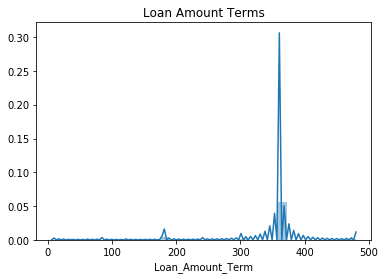

In [52]:
fig = sb.distplot(dataset.loc[:, 'Loan_Amount_Term'].dropna())
plt.title('Loan Amount Terms')
plt.show(fig)

In [53]:
print(statistics.mode(dataset.loc[:, 'Loan_Amount_Term']))

360.0


In [54]:
dataset.loc[:, 'Loan_Amount_Term'].describe()

count    961.000000
mean     342.201873
std       65.100602
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [55]:
dataset['Loan_Amount_Term'].fillna(value=360.0, inplace=True)

In [56]:
dataset.loc[(dataset['Loan_Amount_Term']) <= 300, 'Loan_Amount_Term'] = 325
dataset.loc[(dataset['Loan_Amount_Term']) >= 400, 'Loan_Amount_Term'] = 400

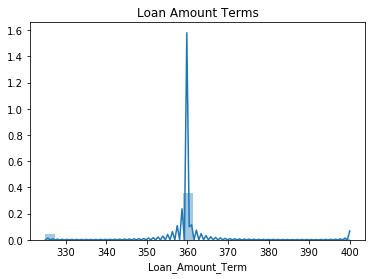

In [57]:
fig = sb.distplot(dataset.loc[:, 'Loan_Amount_Term'].dropna())
plt.title('Loan Amount Terms')
plt.show(fig)

In [58]:
dataset.loc[:, 'Loan_Amount_Term'].value_counts()

360.0    843
325.0    114
400.0     23
350.0      1
Name: Loan_Amount_Term, dtype: int64

In [59]:
dataset.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender1,Married1,Education1,Self_Employed1
0,LP001002,0,5849.0,0.0,120.0,360.0,1.0,Urban,Y,1,0,1,1
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,Rural,N,1,1,1,1
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,0
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,Urban,Y,1,0,1,1


In [60]:
col1 = ['Property_Area']
dataset = pd.get_dummies(dataset, prefix_sep='_', columns = col1, drop_first=False)

In [61]:
dataset.head()

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender1,Married1,Education1,Self_Employed1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849.0,0.0,120.0,360.0,1.0,Y,1,0,1,1,0,0,1
1,LP001003,1,4583.0,1508.0,128.0,360.0,1.0,N,1,1,1,1,1,0,0
2,LP001005,0,3000.0,0.0,66.0,360.0,1.0,Y,1,1,1,0,0,0,1
3,LP001006,0,2583.0,2358.0,120.0,360.0,1.0,Y,1,1,0,1,0,0,1
4,LP001008,0,6000.0,0.0,141.0,360.0,1.0,Y,1,0,1,1,0,0,1


In [62]:
#dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['Loan_Term'] = (dataset['LoanAmount']*100) / dataset['Loan_Amount_Term']
dataset['App_Loan'] = (dataset['LoanAmount'] * 100) / dataset['ApplicantIncome'] 
dataset['Coapp_Loan'] = (dataset['LoanAmount']*100) / (dataset['CoapplicantIncome']+1)
dataset['App_Inc_Term'] = dataset['ApplicantIncome'] / dataset['Loan_Amount_Term']

In [ ]:
names = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(dataset[names])
df = pd.DataFrame(df, columns=names)

In [ ]:
df

In [ ]:
dataset.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)

In [ ]:
dataset = pd.concat([dataset, df], axis=1)

In [ ]:
dataset.loc[:, 'Coapp_Loan'].describe()

In [ ]:
dataset.loc[:, 'Loan_Status'].value_counts()

In [ ]:
dataset.rename(columns={'Loan_Status': 'target'}, inplace=True)
dataset.rename(columns={'Loan_ID': 'id'}, inplace=True)

In [ ]:
dataset.head()

In [ ]:
trainset = dataset.loc[(dataset['target'] != 'X' )]
testset = dataset.loc[(dataset['target'] == 'X' )]
trainset['id'] = trainset.index + 0
testset['id'] = testset.index + 0
del testset['target']

In [ ]:
Dic_Loan_Status = {'Y': 1, 'N': 0}
trainset['target'] = trainset['target'].map(Dic_Loan_Status)

In [ ]:
trainset.head()

In [ ]:
trainset.to_csv('../input/trainset.csv', index=False)
testset.to_csv('../input/testset.csv', index=False)

In [ ]:
trainset.shape